In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Dhaka Rent.csv", sep=";")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

In [5]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [6]:
x = df.area
y = df.rent

In [7]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [8]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Least Square Method

In [11]:
mean_x = np.mean(x)

In [12]:
mean_x

2289.0

In [13]:
mean_y = np.mean(y)

In [14]:
mean_y

37269.166666666664

In [16]:
#calculate deviation
dev_x = x - mean_x
dev_y = y - mean_y

In [18]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [19]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

# Equations
- Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2) <br>- 
Intercept, c = ȳ - m * x̄


## Slope

In [20]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)

In [21]:
m

21.292661473611954

## Intercept

In [25]:
c = mean_y - m * mean_x

In [26]:
c

-11469.7354464311

In [28]:
print(f"Slope, m: {m}")
print(f"Intercept, c: {c}")

Slope, m: 21.292661473611954
Intercept, c: -11469.7354464311


In [29]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [31]:
new_x = int(input("Enter any value of area:"))
pred1 = m * new_x + c
print("Predicted Rent:", pred1)

Enter any value of area: 2000


Predicted Rent: 31115.58750079281


# Sklearn

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()

In [39]:
reg.fit(df[["area"]], y)

LinearRegression()

In [41]:
reg.coef_

array([21.29266147])

In [42]:
reg.intercept_

-11469.735446431114

In [44]:
reg.predict([[2000]])

array([31115.58750079])

In [45]:
pred1 # manual

31115.58750079281

# Formal Work

Text(0.5, 1.0, 'Area-Rent Visualization')

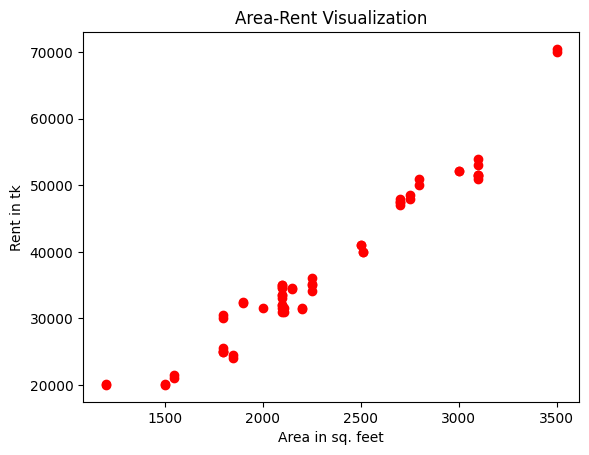

In [50]:
plt.scatter(x,y, color="red")
plt.xlabel("Area in sq. feet")
plt.ylabel("Rent in tk")
plt.title("Area-Rent Visualization")

# Data Split

In [51]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [52]:
from sklearn.model_selection import train_test_split

In [64]:
x = df.drop('rent', axis=1)
y = df[['rent']]

In [57]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [65]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [68]:
xtrain.head() #70% data

,area
15,3100
24,2800
33,2250
17,1550
3,2250


In [69]:
ytrain.head()

,rent
15,51500
24,50000
33,35100
17,21000
3,36100


In [70]:
xtest.head()

,area
9,2100
31,2100
55,3100
23,1200
45,3100


In [71]:
xtest.shape

(18, 1)

In [72]:
xtrain.shape

(42, 1)

In [73]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [74]:
reg.predict(xtest)

array([[33310.44860917],
       [33310.44860917],
       [53634.14849379],
       [15019.118713  ],
       [53634.14849379],
       [36359.00359186],
       [33513.68560801],
       [41643.16556186],
       [61763.62844764],
       [22132.41367262],
       [45504.66853994],
       [61763.62844764],
       [53634.14849379],
       [35342.81859763],
       [46520.85353417],
       [21116.22867839],
       [51601.77850533],
       [27213.33864378]])

In [75]:
ytest.head()

,rent
9,31000
31,35010
55,54000
23,20000
45,51000


In [76]:
ytest['predicted_y'] = reg.predict(xtest)

In [77]:
ytest.head()

,rent,predicted_y
9,31000,33310.448609
31,35010,33310.448609
55,54000,53634.148494
23,20000,15019.118713
45,51000,53634.148494


In [78]:
len(ytest)

18

In [80]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [81]:
ytest.head()

,rent
9,31000
31,35010
55,54000
23,20000
45,51000


In [84]:
#Training Accuracy
reg.score(xtrain, ytrain)

0.9469441120857744

In [83]:
#Testing Accuracy
reg.score(xtest, ytest)

0.9453413903883968

# MSE & MAE

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [91]:
mse

12747923.212867547

In [92]:
mae = mean_absolute_error(ytest, reg.predict(xtest))

In [93]:
mae

2729.507036679097

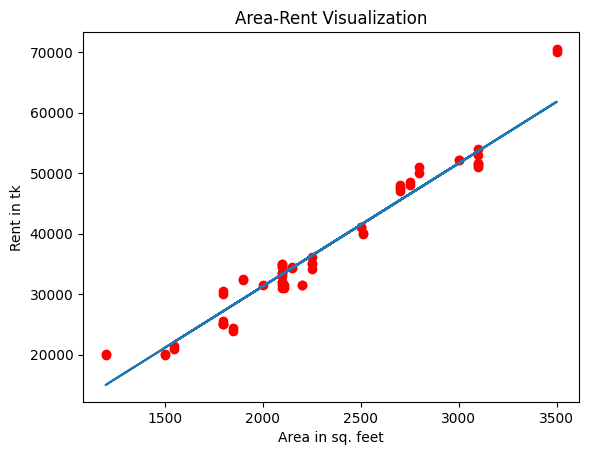

In [97]:
plt.scatter(x, y, color='red')
plt.xlabel('Area in sq. feet')
plt.ylabel('Rent in tk')
plt.title('Area-Rent Visualization')
plt.plot(xtest, reg.predict(xtest))

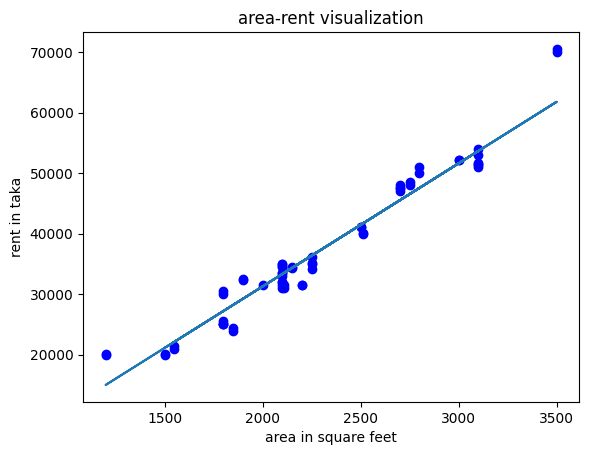

In [98]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))